# EDA To Prediction (DieTanic)

**예측을 위한 탐색적 데이터 분석**

* Competition / Dataset : [Titanic: Machine Learning from Disaster](http://https://www.kaggle.com/c/titanic)
* Date : 10. Aug. 2019 
* Writer : @[Ashwini Swain](https://www.kaggle.com/ash316)
* Link : https://www.kaggle.com/ash316/eda-to-prediction-dietanic
* Translator : @[Isaac_Lee](http://https://www.kaggle.com/isaaclys)

***Translator's words / 역자의 말***

I started to translate the kernels written by other person to Korean to study Data Science. Some words can be interpreted randomly in Korean, and there may be some differences from common terms. Please comment if there is such a thing. And please **UPVOTE!** It will motivates me a lot! **Thank You!**

저도 공부할겸 다른분께서 쓰신 커널을 한국어로 번역하기를 시작했습니다. 부족한 가독성과 오역을 너그럽게 이해해주시고, 특정 단어들은 제 임의로 한국어로 번역을 해서 일반적으로 사용하는 용어와 다른 것이 있을 수 있습니다. 그런 것이 있다면 코멘트 해주세요. 그리고 **UPVOTE!** 부탁드려요. 많은 동기부여가 됩니다. 감사합니다!

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name **DieTanic**.  This is a very unforgetable disaster that no one in the world can forget.
- 타이타닉 호의 침몰은 역사상 가장 악명높은 난파선 사건중 하나였습니다. 1912년 4월 15일 첫 항해에서 타이타닉은 빙하에 부딪혀서 승객과 승무원 2224명 중 1502명을 죽였습니다. DieTanic이라는 이름의 이유입니다. 이 사건은 전 세계 사람들이 잊을 수 없는 사건입니다.

It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision. The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in competitions in Kaggle.

- 타이타닉을 건조 비용 750만 달러는 충돌로 인해 바다 밑에 가라 앉았습니다. 타이타닉 데이터는 데이터 사이언스 입문자가 캐글 competition 여행을 시작하기 좋은 자료입니다.

The Objective of this notebook is to give an **idea how is the workflow in any predictive modeling problem**. How do we check features, how do we add new features and some Machine Learning Concepts. I have tried to keep the notebook as basic as possible so that even newbies can understand every phase of it.

- 이 노트북의 목적은 어떠한 흐름으로 예측 모델링 문제를 풀어가는지 아이디어를 주기 위함입니다. 어떻게 피처(특징)을 확인하고, 어떻게 새로운 피처와 머신러닝(기계학습) 개념을 추가할까요? 저는 이 노트북을 가능한 쉽게 작성하여 한줄한줄 모두 입문자들도 이해할 수 있게 했습니다.

If You Like the notebook and think that it helped you..**PLEASE UPVOTE**. It will keep me motivated.

- 만약 도움이 되셨다면...UPVOTE 해주시면 감사하겠습니다. 이는 저의 동기부여가 될 것입니다.

## Contents of the Notebook: 노트북의 목차


#### Part1: Exploratory Data Analysis(EDA): 탐색적 데이터 분석
1)Analysis of the features. 

- 1)피처 분석하기


2)Finding any relations or trends considering multiple features.

- 2)복수 피처를 고려한 연관 관계나 동향 찾기


#### Part2: Feature Engineering and Data Cleaning: 피처 엔지니어링과 데이터 클리닝
1)Adding any few features.

- 1)몇개의 피처를 더하기


2)Removing redundant features.

- 2)남는 피처를 지우기


3)Converting features into suitable form for modeling.

- 3)각 피처를 모델링(머신러닝 모델링)하기 좋게 변환하기


#### Part3: Predictive Modeling: 예측 모델링
1)Running Basic Algorithms.

- 1)기본적인 알고리즘 실행하기


2)Cross Validation.

- 2)교차 검증하기


3)Ensembling.

- 3)앙상블하기(쉽게말해 여러 모델을 합치기)


4)Important Features Extraction.

- 4)중요한 피처 추출하기

## Part1: Exploratory Data Analysis(EDA) / 탐색적 데이터 분석

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [2]:
data=pd.read_csv('../input/train.csv') 

In [3]:
data.head()  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The **Age, Cabin and Embarked** have null values. I will try to fix them.

나이, 선실 그리고 어디서 탑승했는지에 Null이 있습니다. 제가 조금 고쳐보겠습니다.

### How many Survived?? / 얼마나 많이 살아남았나??

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8)
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

SyntaxError: invalid syntax (<ipython-input-5-89b74ef15177>, line 2)

It is evident that not many passengers survived the accident. 
- 이것은 사고에서 많은 사람들이 살아남지 못했다는 증거입니다.

Out of 891 passengers in training set, only around 350 survived i.e Only **38.4%** of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

- 891명의 훈련 데이터들 중에 350명정도, 즉 전체에서 **38.4%** 가 사고에서 살아남았습니다. 우리는 더 나은 인사이트를 위해서 어떤 부류의 사람들이 살아남았고, 그렇지 못했는지 파고들것입니다.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

- 우리는 생존비율을 다른 피처인 성별, 탑승지 나이 등으로 확인할 것입니다.

First let us understand the different types of features.

- 먼저 우리는 각기 다른 유형의 피처를 살펴봅시다.

## Types Of Features / 피처 타입

### Categorical Features: 카테고리 피처

A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables**.

- 카테고리 피처는 2개 이상의 카테고리로 각각의 값들을 분류 가능한 피처입니다. 예를 들어 성별은 카테고리 피처로 2개의 카테고리(남자, 여자)를 갖고 있습니다. 명사 피처라고도 불리는 이 피처는 정렬을 하거나 어떤 순서를 부여 할 수 없습니다.

**Categorical Features in the dataset: Sex(성별),Embarked(탑승지).** 

### Ordinal Features: 순서 피처
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal variable. Here we can have a relative sort in the variable.

- 순서 피처는 카테고리 피처와 비슷합니다. 다만 카테고리 피처와 다르게 상대적인 순서를 부여하거나 정렬 할 수 있습니다. 예를 들어 크다, 중간이다, 작다의 값을 가진 "키"피처가 있다면 "키"는 순서 피처리고 할 수 있습니다. 이때 우리는 변수들을 상대적으로 정렬할 수 있습니다.

**Ordinal Features in the dataset: PClass(일등석인지 이등석인지 등)**

### Continous Feature: 연속 피처
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

- 어떤 피처가 연속이라면 두지점 사이 또는 최댓값과 최소값 사이에서 값을 하나 정할 수 있습니다.

**Continous Features in the dataset: Age(나이)**

## Analysing The Features / 피처 분석

## Sex --> Categorical Feature
## 성별 --> 카테고리 피처

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

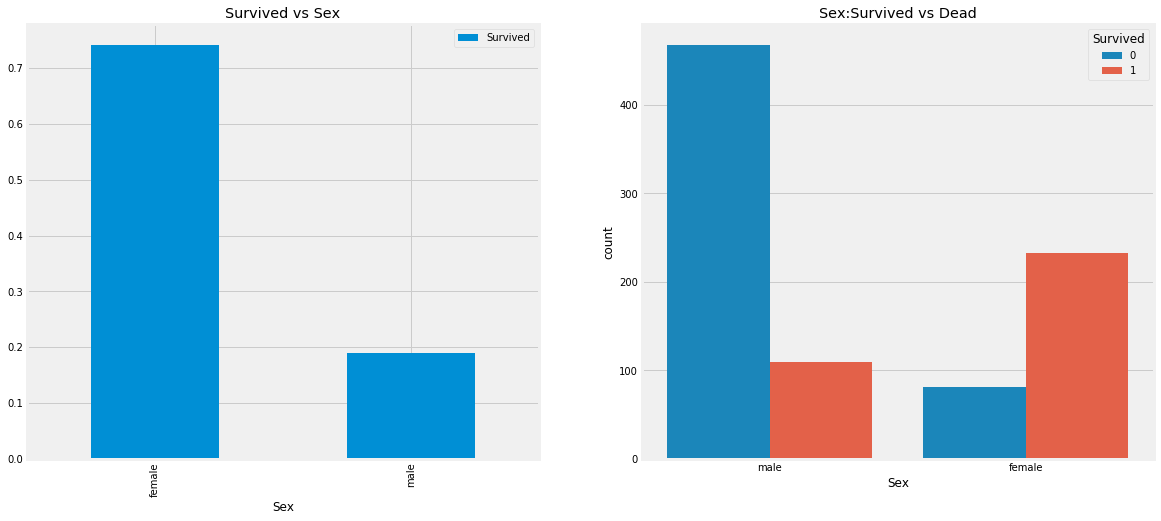

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a **women on the ship is around 75% while that for men in around 18-19%.**
- 흥미로운 결과 입니다. 배에 탑승한 남자의 숫자는 여자 보다 많습니다. 그러나 생존한 여자의 숫자는 생존한 남자의 숫자의 두배입니다. 여자의 생존 비율은 75%이지만, 남자는 18~19%밖에 되지 않습니다.

This looks to be a **very important** feature for modeling. But is it the best??   Lets check other features.
- 이는 모델링을 할때 매우 중요해 보입니다. 하지만 최선일까요?? 다른 피처들도 살펴봅시다.

## Pclass --> Ordinal Feature
## Pclass --> 순서피처

In [8]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


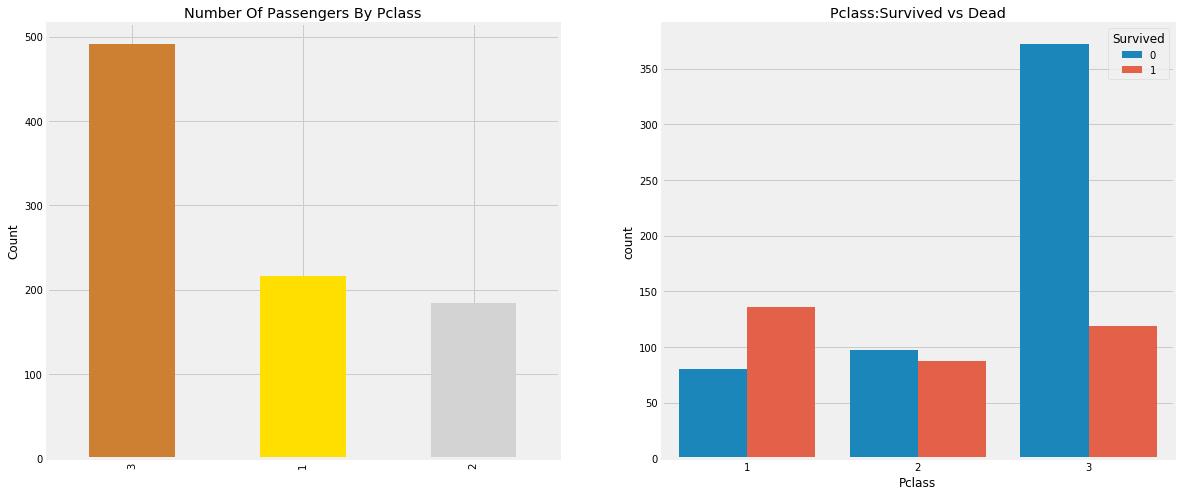

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

People say **Money Can't Buy Everything**. But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around **25%**.
- 사람들은 돈이 모든 것을 살 수 없다고 합니다. 하지만 우리는 1등석에 탑승한 승객들은 매우 높은 우선 순위로 구조되었다는 것을 볼 수 있습니다. 3등석의 승객수가 더 많았지만 생존한 승객은 25%정도로 매우 낮았습니다.

For Pclass 1 %survived is around **63%** while for Pclass2 is around **48%**. So money and status matters. Such a materialistic world.
- 1등석은 63% 정도가 생존 했고, 2등석은 48%정도 생존 했습니다. 돈과 생존상태에는 관련이 있습니다. 이런 물질주의적인 세상!(역자: 느낌표는 제가 넣었습니다.)

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with **Sex and Pclass** Together.
- 또 다른 흥미로운 관찰 결과가 있는지 더 들어가 봅시다. 성별과 Pclass를 같이 확인해 봅시다.

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

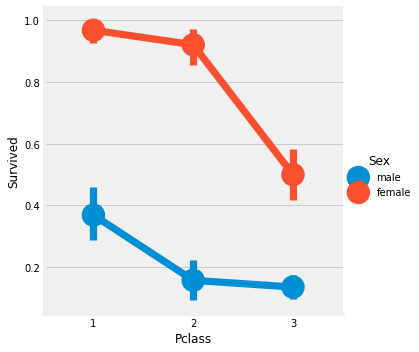

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

We use **FactorPlot** in this case, because they make the seperation of categorical values easy.
- 우리는 이번 케이스에서 FactorPlot을 이용했는데, 카테고리 값들의 분리를 잘 보여주기 때문입니다.

Looking at the **CrossTab** and the **FactorPlot**, we can easily infer that survival for **Women from Pclass1** is about **95-96%**, as only 3 out of 94 Women from Pclass1 died. 
- Cross Tab과 FactorPlot을 보면 우리는 1등석의 여자들은 94명중 3명만 생존하지 못해 약 95~96%가 생존한것을 볼 수 있다.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate. 
- 이것은 Pclass에 상관없이 여자는 구조에서 우선 순위를 차지한다는 증거가 됩니다. 1등석의 남자도 여전히 생존 비율은 낮습니다.

Looks like Pclass is also an important feature. Lets analyse other features.
- Pclass도 중요한 피처인것 같군요. 다른 피처들도 살펴 봅시다.

## Age --> Continous Feature
## 나이 --> 연속 피처


In [12]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


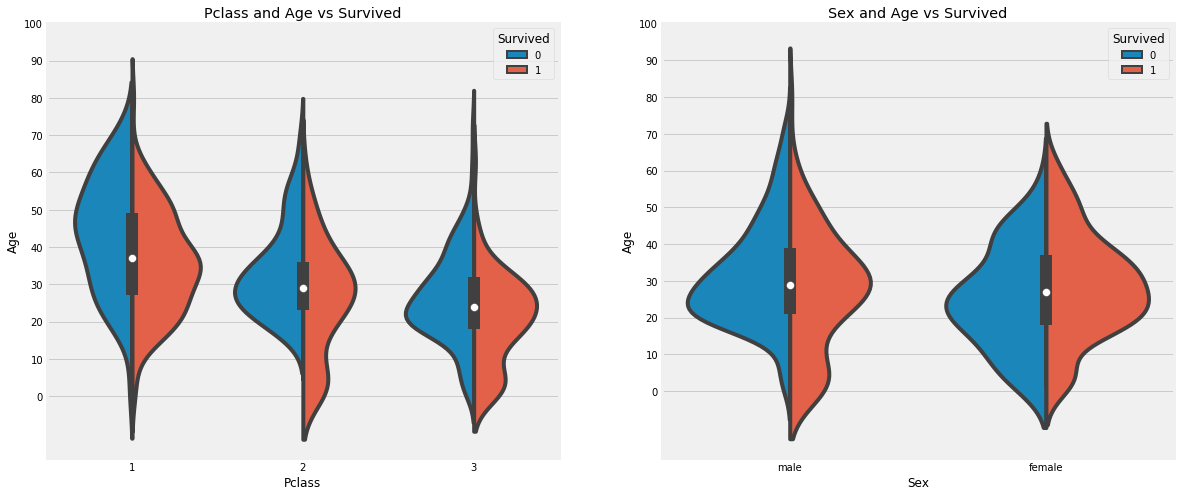

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Observations: 관찰결과

1)The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.
- 1) 어린이의 숫자는 Pclass가 높아질수록(3등석에 가까울 수록) 높아졌고, 10살 이하의 승객들(예: 어린이)의 생존 비율은 Pclass와 상관 없다는 것을 잘 보여줌.

2)Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.
- 2) 1등석에 탑승한 20~50살의 승객들의 생존 기회는 매우 높았는데 이는 여자일 수록 더 높음.

3)For males, the survival chances decreases with an increase in age.
- 3) 남자들은 나이가 많을 수록 생존 기회가 낮아짐.

As we had seen earlier, the Age feature has **177** null values. To replace these NaN values, we can assign them the mean age of the dataset.
- 우리가 앞서 봤듯이 나이값에는 177개의 Null값이 있습니다. 우리는 나이 데이터의 평균값으로 Null값을 대체 할 수 있습니다.


But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??
- 그러나 문제가 있습니다. 많은 사람이 다양한 나이를 가지고 있습니다. 우리가 4살의 아이를 29살이라고 작성할 수는 없습니다. 어떠한 나이대에 승객이 속해있는지 아는 방법이 없을까요?


**Bingo!!!!**, we can check the **Name**  feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.
- 옳거니!(역자: 개그포인트 입니다.ㅎㅎ) 우리는 이름 피처를 살펴 볼 수 있습니다. 우리가 이름 피처를 볼 때 우리는 Mr나 Mrs와 같은 이니셜이 붙는 것을 알 수 있습니다. 따라서 Mr와 Mrs의 평균값을 각 그룹에 할당 할 수 있습니다.

**''What's In A Name??''**---> **Feature**  :p
- **이름에는 뭐가 있죠??**---> **"피처"**  :P

In [14]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

Okay so here we are using the Regex: **[A-Za-z]+)\.**. So what it does is, it looks for strings which lie between **A-Z or a-z** and followed by a **.(dot)**. So we successfully extract the Initials from the Name.
- 우리는 여기서 명령어 **[A-Za-z]+)\.**를 사용합니다. 이 명령어가 하는 것은 **A-Z** **a-z**의 문자열 중에 **.(마침표)**가 뒤에 붙어있는 것들을 찾습니다. 우리는 성공적으로 그 문자열들의 이니셜을 추출할 수 있습니다.

In [15]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.
- 여기에는 Mlle와 Mme과 같이 Miss를 잘못 표기한 것들이 있습니다. 저는 그것을 다른 Miss로 바꿔 줄겁니다. 다른 값들도 마찬가지로 해줍니다.

In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages
### Null 나이값을 채워주기

In [18]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [19]:
data.Age.isnull().any() #So no null values left finally 

False

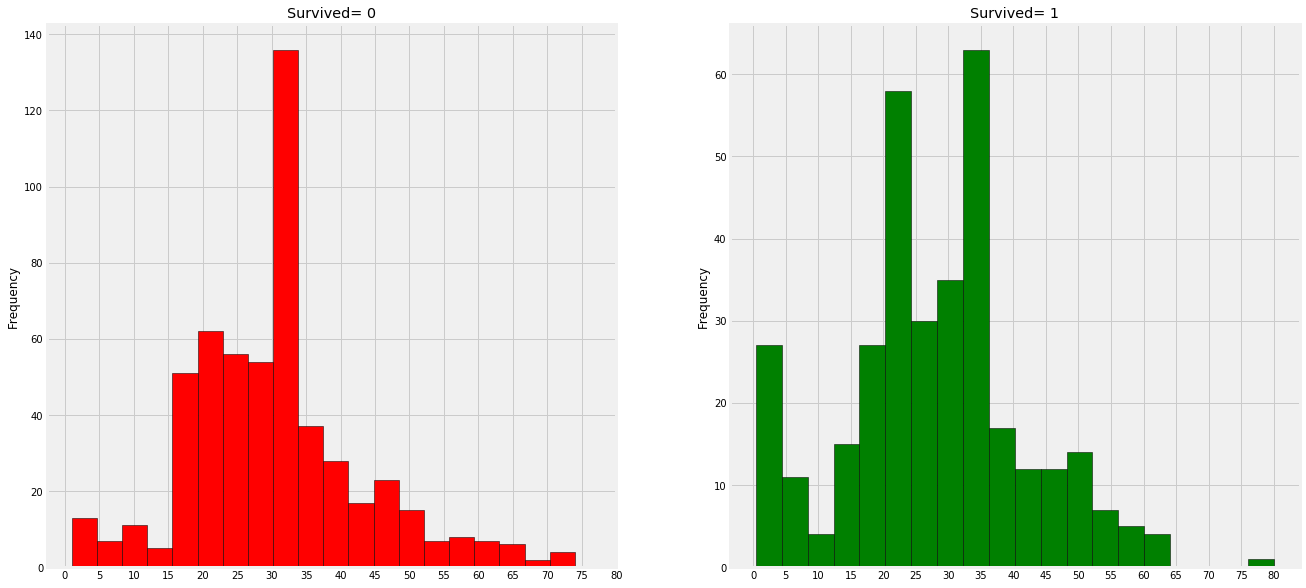

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### Observations: 관찰결과
1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).
- 1) 유아(5세미만)는 더 큰 숫자로 구조 됨(여자와 아이 먼저 법칙).

2)The oldest Passenger was saved(80 years).
- 2) 가장 연장한 사람도 구조 됨(80세).

3)Maximum number of deaths were in the age group of 30-40.
- 3) 가장 사망자 숫자가 높은 그룹은 30-40세 그룹.

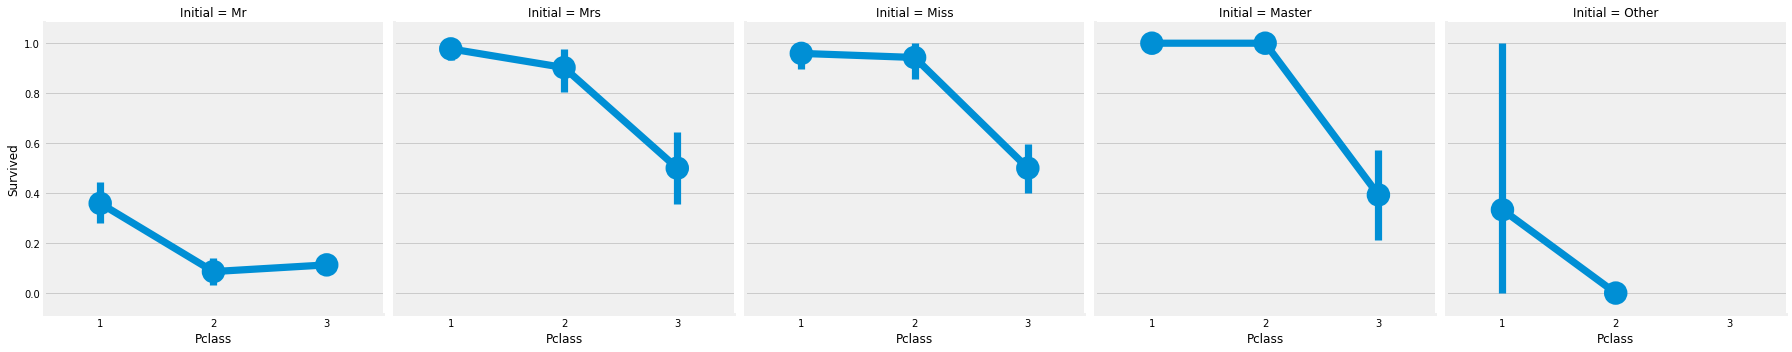

In [21]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

The Women and Child first policy thus holds true irrespective of the class.
- 여자와 아이 먼저 법칙은 Pclass와 상관없습니다.

## Embarked --> Categorical Value
## 탑승장소 --> 카테고리 값

In [22]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### Chances for Survival by Port Of Embarkation
### 승선장소에 따른 생존 확률

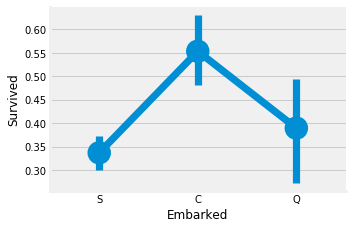

In [23]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.
- C포트에서 승선한 승객이 0.55로 가장 높은 확률로 생존했고, S에서 탑승한 승객이 가장 낮았습니다.

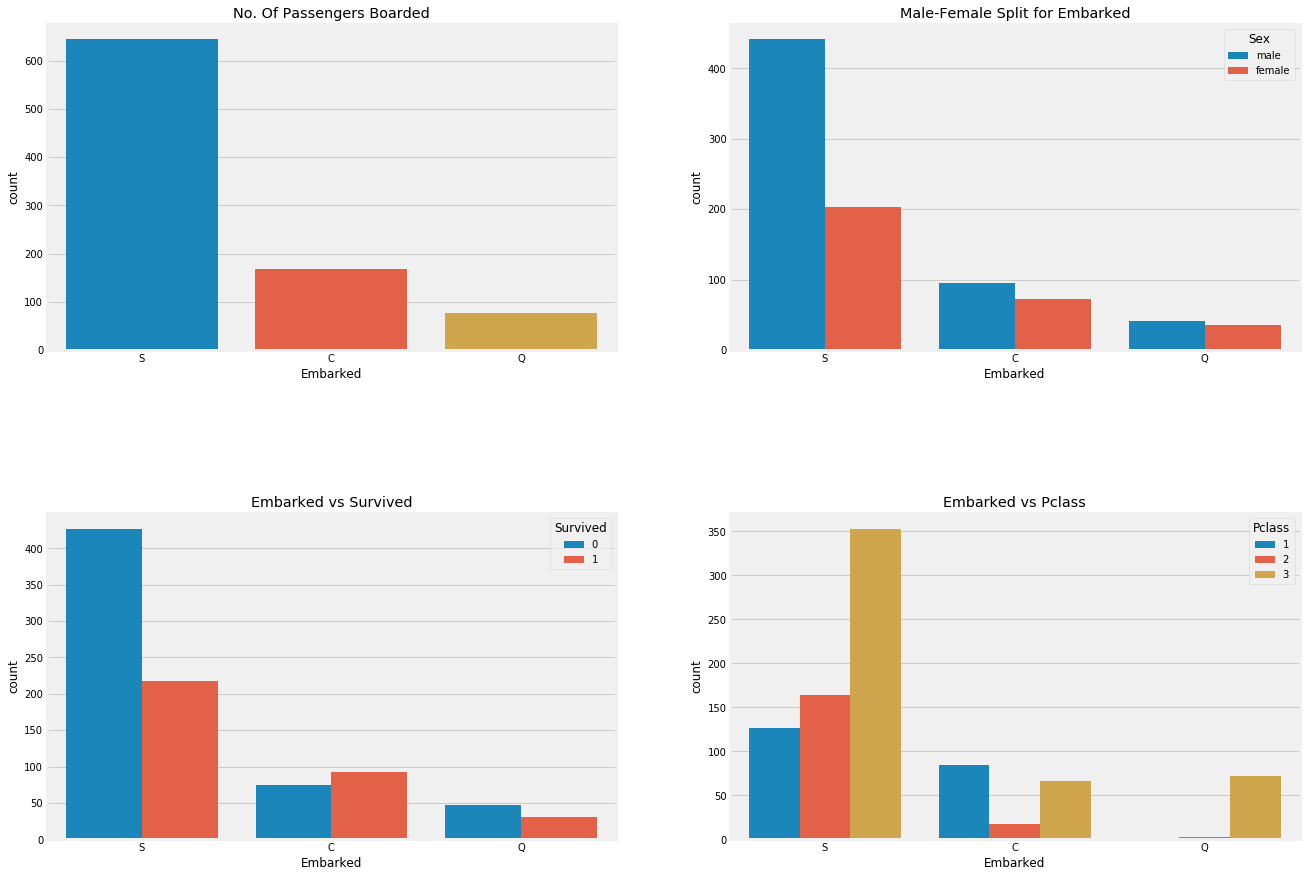

In [24]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### Observations: 관찰결과
1)Maximum passenegers boarded from S. Majority of them being from Pclass3.
- 1) S에서 가장 많은 승객이 탑승함. 주된 승객들을 3등석.

2)The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.
- 2) C에서 탑승한 그들의 대부분이 살아남은걸로 봐서 운이 좋다고 생각할 수 있음. 사실은 그들은 모두 1등석과 2등석 승객이었음.

3)The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around **81%** didn't survive. 
- 3) S에서 승선한 사람들도 대부분이 부자들이었음. 그래도 여전히 그들의 생존 확률은 낮음. 3등석의 81%가 살아남지 못했기 때문임.

4)Port Q had almost 95% of the passengers were from Pclass3.
- 4) Q에서 탑승한 95%의 승객들은 3등석임.

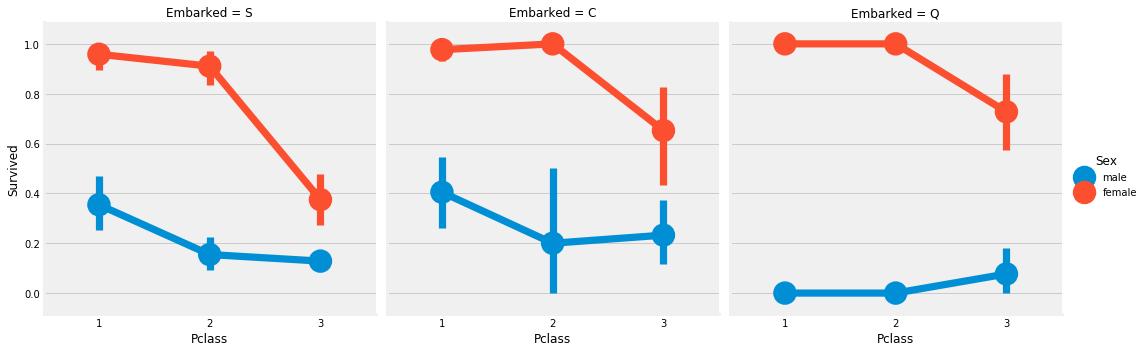

In [25]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

### Observations: 관찰결과

1)The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.
- 1) 1등석과 2등석에 있던 여자들은 승선장소와 관계없이 생존 확률이 거의 1.

2)Port S looks to be very unlucky for Pclass3 Passenegers as the survival rate for both men and women is very low.**(Money Matters)**
- 2) S에서 승선한 3등석 승객들은 남자와 여자 모두 생존 확률이 낮음. (돈은 중요합니다)

3)Port Q looks to be unlukiest for Men, as almost all were from Pclass 3.
- 3) Q에서 승선한 사람들이 거의 3등석이었다는 것을 생각하면 남자들에게 가장 불운함.

### Filling Embarked NaN / 승선 Null값 채우기

As we saw that maximum passengers boarded from Port S, we replace NaN with S.
- 우리는 S에서 가장 많은 승객이 탑승한것을 보았음으로 Null값을 S로 채워넣을 겁니다.

In [26]:
data['Embarked'].fillna('S',inplace=True)

In [27]:
data.Embarked.isnull().any()# Finally No NaN values

False

## SibSip --> Discrete Feature
## SibSip --> 가산(셀 수 있는) 피처
This feature represents whether a person is alone or with his family members.
- 이 피처는 어떤 사람이 혼자인지 가족과 같이 있는지를 나타냅니다.

Sibling = brother, sister, stepbrother, stepsister
- 형제자매 = 형제, 자매, 이복형제, 이복자매

Spouse = husband, wife 
- 배우자 = 남편, 아내

In [28]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


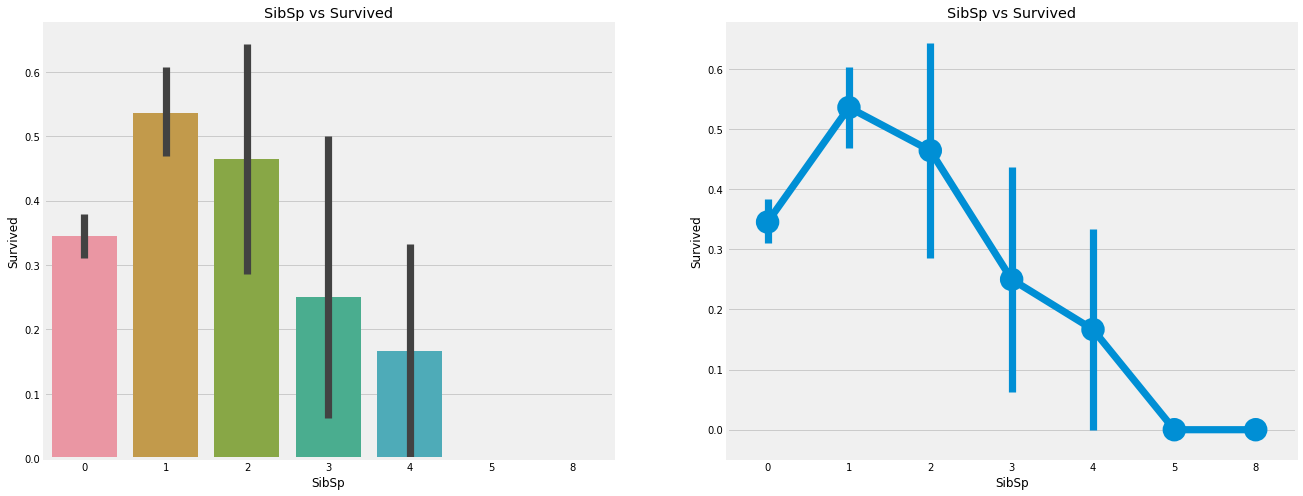

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [30]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Observations: 관찰결과


The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is **0%**. The reason may be Pclass??
- barplot과 factorplot을 보면 혼자 탑승한 승객인 경우 34.5%의 생존 비율을 보였고, 그래프는 형제자매의 숫자가 커질 수록 roughl하게 감소했습니다. 일리가 있는 변화입니다. 저도 가족이 있는 승객이라면, 제가 살기보다는 먼저 제 가족을 살릴 것입니다. 놀랍게도 5-8명의 구성원을 가진 가족의 생존 비율은 **0%**입니다. Pclass가 이유일 수 있겠네요?

The reason is **Pclass**. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.
- 그 이유는 Pclass가 맞았습니다. crosstab은 3명 이상의 동승자가 있는 사람의 경우 모두 3등석이었습니다. 이것은 3등석에 탑승한 대가족은 모두 살아남지 못한것에 가깝습니다.

## Parch

In [31]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3.
- crosstab은 다시금 대가족은 3등석에 있었다는 사실을 알려줍니다.

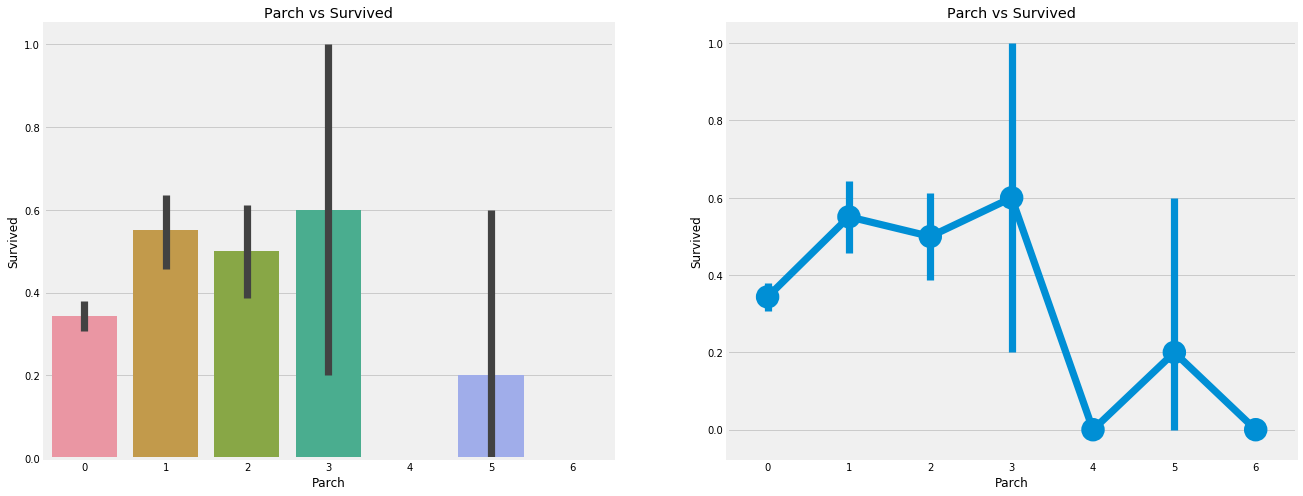

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

### Observations: 관찰결과

Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.
- 다시 여기서도 결과는 비슷합니다. 가족이 함께 승선한 승객들은 더 큰 생존의 기회가 있었습니다. 어찌되었든 이 기회도 가족구성원이 늘어날수록 감소했습니다.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.
- 1-3명의 가족이 함께 탑승한 승객의 경우 생존의 기회가 가장 좋았습니다. 혼자인 경우도 누군가 4명이상의 가족을 동반할 때와 같이 생존의 기회가 감소했습니다.

## Fare --> Continous Feature
## 비용 --> 연속 피처

In [33]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


The lowest fare is **0.0**. Wow!! a free luxorious ride. 
- 가장 낮은 요금은 **0.0**이었습니다. 와우! 무료로 호화로운 크루즈 여행이네요.

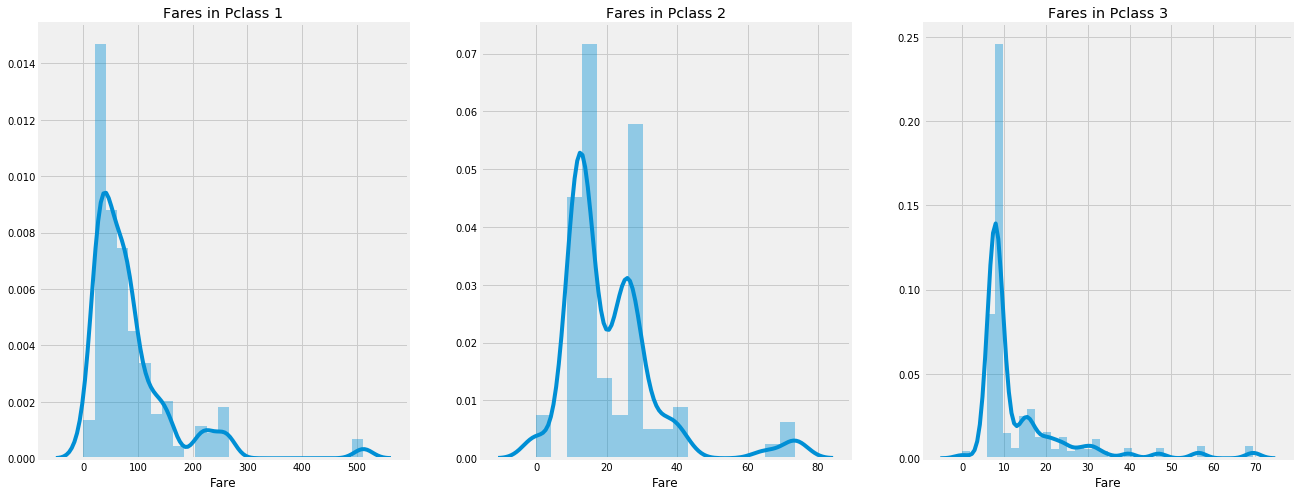

In [34]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.
- 1등석에 탑승한 승객이 가장 큰 분포를 보였고, 이 분포는 표준 편차가 줄어들수록 감소했습니다. 이것 역시 연속된 자료이기 때문에 binning을 이용해서 이산적인 값으로 바꿀 수 있습니다.

## Observations in a Nutshell for all features: 모든 피처에 대한 간단한 분석 결과

**Sex:** The chance of survival for women is high as compared to men.
- **성별:** 여자의 생존 확률은 남자에 비해 높음.

**Pclass:**There is a visible trend that being a **1st class passenger** gives you better chances of survival. The survival rate for **Pclass3 is very low**. For **women**, the chance of survival from **Pclass1** is almost 1 and is high too for those from **Pclass2**.   **Money Wins!!!**. 
_ **Pclass:**1등석 승객**이 더 높은 생존 기회를 제공하는 흐름을 볼수 있음.**3등석**의 승객의 경우 생존 확률이 **매우 낮음**. 1등석에 탑승한 **여성**승객의 경우 2등석과 다르게 생존비율이 매우높은 거의 100% 수준임. **돈 많은 놈이 이긴다!!!**

**Age:** Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.
- **나이:** 5-10살 보다 어린 아이들의 경우 높은 확률로 생존 함. 15-35세의 승객이 가장 많이 살아남지 못함.

**Embarked:** This is a very interesting feature. **The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S.** Passengers at Q were all from **Pclass3**. 
- **승선장소:** 매우 흥미로운 피처임. **S에서 승선한 주된 승객이 1등석임에도 불구하고 C에서 탑승한 사람들의 생존확률이 더 좋음.** Q에서 탑승한 승객은 모두 3등석임.

**Parch+SibSp:** Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.
- **배우자+가족:** 1-2명의 형제와 동승한 경우 또는 1-3명의 가족과 동승한 경우가 많은 가족과 함께 탑승한 경우보다 더 좋은 확률로 생존함.

## Correlation Between The Features / 피처들 사이의 관계

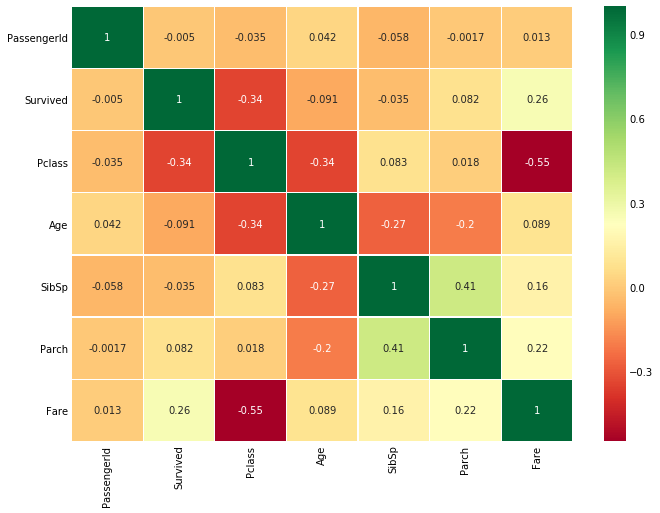

In [35]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Interpreting The Heatmap / Heatmap 분석

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.
- 일단 우리는 문자들 또는 문자열 사이의 관계를 알아볼 수 없기 때문에 숫자피처들만 비교할겁니다. 그래프를 이해하기 전에 정확히 어떤 관계가 있는 지 살펴봅시다.

**POSITIVE CORRELATION:** If an **increase in feature A leads to increase in feature B, then they are positively correlated**. A value **1 means perfect positive correlation**.
- **양성 상호관계:**: 어떤 피처A의 증가가 피처B의 증가로 이어진다면, 그 둘은 양성 상호관계에 있다고 합니다. 1은 완벽한 양성 상호관계입니다.

**NEGATIVE CORRELATION:** If an **increase in feature A leads to decrease in feature B, then they are negatively correlated**. A value **-1 means perfect negative correlation**.
- **음성 상호관계:** 어떤 피처A의 증가가 피처B의 감소로 이어진다면, 그 둘은 음성 상호관계에 있다고 합니다. -1은 완벽한 음성 상호관계입니다.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as **MultiColinearity** as both of them contains almost the same information.
- 어떤 두 피처가 서로 완벽하게 또는 높은 상호관계에 있다고 합시다. 그래서 한 피처의 증가가 다른 하나의 증가를 가져올때 그 둘은 서로 비슷한 정보를 갖고 있고 그 둘은 변화가 적거나 거의 없습니다. 이것은 다중공선성(역자: 직역하자면 그렇습니다.)이라고 둘이 거의 같은 정보를 담고 있음을 뜻합니다.

So do you think we should use both of them as **one of them is redundant**. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.
- 우리는 둘중 하나가 불필요하다는 것을 알면서도 둘다 사용해야할까요. 우리가 훈련 모델을 만들면서 우리는 그런 불필요한 피처들을 제거함으로서 훈련시간을 감소시키고 다른 이점을 얻을 수 있습니다.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between **SibSp and Parch i.e 0.41**. So we can carry on with all features.
-  이제 위에 heatmap에서 우리는 각각의 피처들이 서로 상호관계가 강하지 않다는 것을 볼 수 있습니다. 가장 높은 상호관계는 형제와 배우자로 **0.41**입니다. 따라서 우리는 모든 피처들을 가지고 갈 수 있습니다.

## Part2: Feature Engineering and Data Cleaning / 피처 엔지니어링과 데이터 정제

Now what is Feature Engineering?
- 피처 엔지니어링은 무엇이냐?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.
- 우리가 피처를 가진 데이터를 얻게 되면, 모든 피처가 필요하거니 중요하지 않습니다. 제거가 필요한 불필요한 피처가 있을 수 있습니다. 또한 우리는 관찰과 다른 피처들에서부터 추출한 정보들로 새로운 피처를 만들 수 있습니다.

An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.
- 그 예시로 이름피처에서 이니셜 피처를 추출한것을 들 수 있습니다. 한번 어떤 피처를 더하거나 제거할 수 있을 지 봅시다. 그리고 기존의 관련 피처들을 예측 모델링을 하기에 적합하게 변환할 것입니다.

## Age_band / 나이_대

#### Problem With Age Feature: 나이 피처의 문제
As I have mentioned earlier that **Age is a continous feature**, there is a problem with Continous Variables in Machine Learning Models.
- 제가 전에도 언급했듯이 **나이는 연속 피처** 입니다. 머신 러닝 모델에서 연속피처는 문제가 있습니다.

**Eg:**If I say to group or arrange Sports Person by **Sex**, We can easily segregate them by Male and Female.
- **예시:** 만약 제가 스포츠인을 성별로 그룹짓거나 분류하라 하면, 우리는 쉽게 남성과 여성으로 분류할 수 있습니다.

Now if I say to group them by their **Age**, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.
- 이제 그들을 **나이**로 나눠보라고 하면, 어떻게 할 것인가요? 만약 30명의 사람이 있다면 30개의 값들이 있습니다. 이제 문제가 생겼습니다.

We need to convert these **continous values into categorical values** by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.
- 우리는 Binning or Normalisation(정규화)를 통해 **연속 피처**를 **카테고리 피처**로 바꿀 필요가 있습니다. 저는 binning을 이용할 것인데, 예를 들어 특정 나이 영역에 하나의 큰 값을 할당하는 방식입니다.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16.
So bins of size 16.
- 최고령자는 80세 였습니다. 따라서 0-80의 영역을 5개의 큰 덩어리로 나눕시다. 80/5=16이므로 각각 16년의 크기를 가진 덩어리가 나오겠네요.

In [36]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [37]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


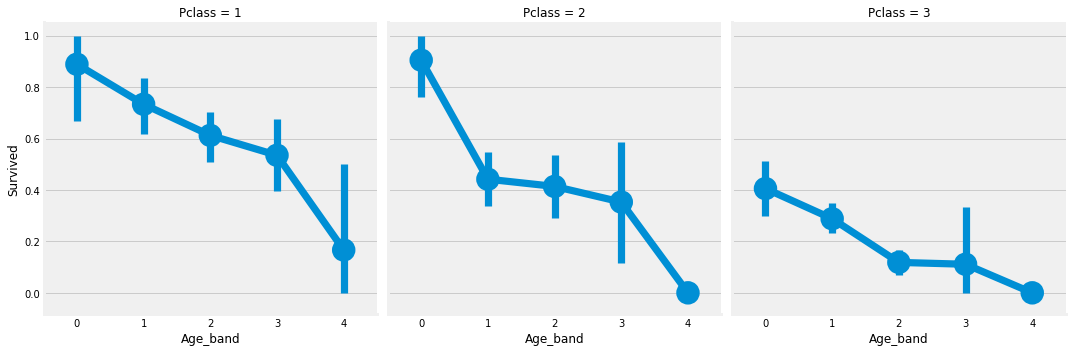

In [38]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

True that..the survival rate decreases as the age increases irrespective of the Pclass.
- Pclass와 관계 없이 나이가 증가함에 따라 생존 비율이 감소했습니다.

## Family_Size and Alone / 가족_크기 그리고 혼자승선
At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.
- 이 시점에서 우리는 "가족크기" 와 "혼자승선(이하 혼자)" 라는 피처를 분석을 통해 추가할 수 있습니다. 이 피처는 배우자와 형제자매의 요약된 버전입니다. 이것은 우리에게 합쳐진 데이터를 보여주는데 이는 승객의 가족 크기에 따라 변화하는 생존 비율을 체크할 수 있게 해줍니다. 혼자는 말그대로 승객이 혼자인지 아닌지 표시합니다.

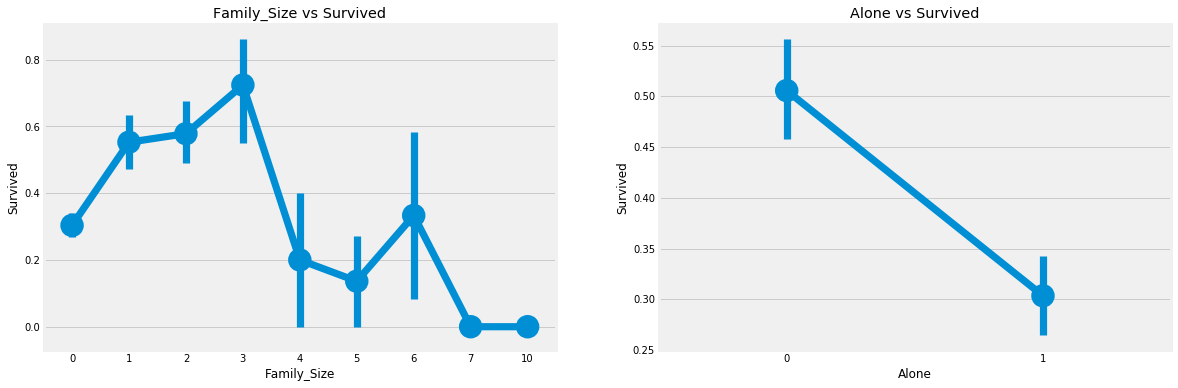

In [39]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

**Family_Size=0 means that the passeneger is alone.** Clearly, if you are alone or family_size=0,then chances for survival is very low. For family size > 4,the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.
- **가족_크기=0의 의미는 승객이 혼자라는 뜻입니다.** 분명하게, 만약 당신이 혼자거나 가족크기가 0이라면, 당신의 생존 확률은 많이 낮습니다. 4인 이상의 가족인 경우도 마찬가지로 감소합니다. 이것도 모델에서 중요한 피처들처럼 보입니다. 뒤에서 조금 더 다뤄 봅시다.

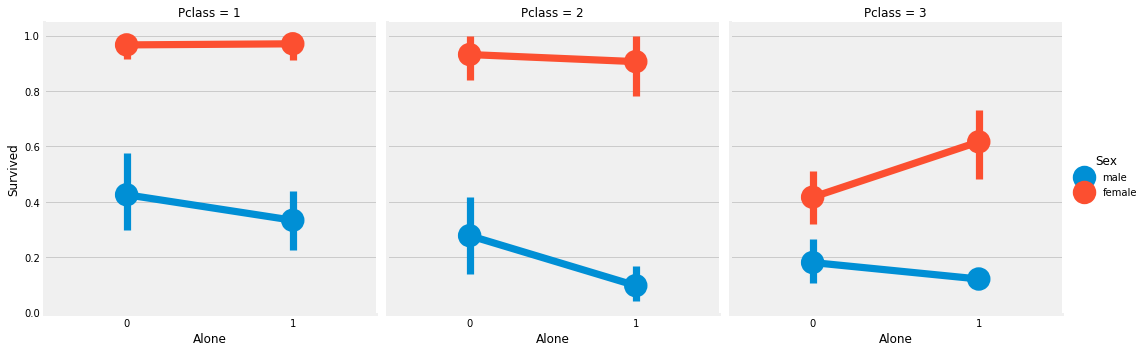

In [40]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.
- 성별과 Pclass와 상관없이 혼자인것은 3등석에 탑승한 여성승객의 경우 가족과 함께 승선한 여성승객에 비해 혼자인 경우가 좋지 않다는 것을 볼 수 있습니다.

## Fare_Range / 비용_범위

Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use **pandas.qcut**.
- 비용도 연속 피처이기 때문에, 우리는 순서가 있는 값으로 바꿔주어야 합니다. 이때 우리는 **pandas.qcut**를 사용합니다.

So what **qcut** does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.
- **qcut**는 우리가 넘겨준 단위의 크기에 따라 값들을 나누거나 모아 줍니다. 만약 우리가 5의 단위 를 넘겨줬다면, 5의 단위나 값의 범위로 나눠줍니다.

In [41]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As discussed above, we can clearly see that as the **fare_range increases, the chances of survival increases.**
- 위에서 알아봤듯이 우리는 **비용의 증가는 생존확률을 높인다**는 것을 분명하게 볼 수 있습니다.

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in **Age_Band**
    - 이제 우리는 비용_범위 값을 그대로 넘길 수 없습니다. 우리는 "나이_범위"에서와 같은 싱글 톤 값으로 변환해 주어야 합니다. (연속 피처를 카테고리 피처로 변환)

In [42]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

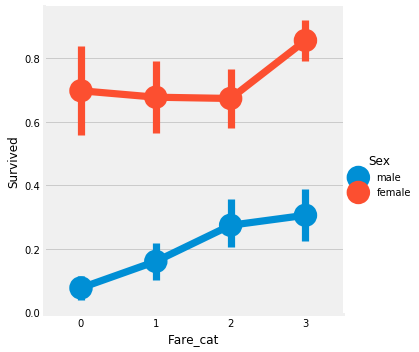

In [43]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.
- 분명하게, Fare_cat(비용_카테고리) 증가할수록 생존 확률이 증가합니다. 이 피처는 성별과 함께 모델링에서 중요할 것입니다.

## Converting String Values into Numeric / 문자열 값을 숫자 값으로 변환

Since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.
- 우리가 문자열을 머신러닝 모델에 넘겨줄 수 없기 때문에, 우리는 성별, 승선 장소 등 을 숫자 값으로 변환해야합니다.

In [44]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### Dropping UnNeeded Features / 불필요한 피처 버리기

**Name**--> We don't need name feature as it cannot be converted into any categorical value.
- **이름**--> 이름: 어떠한  카테고리 값으로 변환 할 수 업기 때문에 필요하지 않습니다.

**Age**--> We have the Age_band feature, so no need of this.
- **나이**--> 우리는 나이_대 피처가 있음으로 필요하지 않습니다.

**Ticket**--> It is any random string that cannot be categorised.
- **티켓**--> 이건 랜덤한 문자열 자료이므로 카테고리화 시킬 수 없습니다.

**Fare**--> We have the Fare_cat feature, so unneeded
- **비용** 이건 랜덤한 문자열 자료이므로 카테고리화 시킬 수 없습니다.

**Cabin**--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.
- **선실**--> 많은 null값들이 있고 많은 승객들이 복수의 선실을 갖고 있기에 불필요합니다

**Fare_Range**--> We have the fare_cat feature.
- **비용_범위**--> 우리는 비용카테고리가 있습니다.

**PassengerId**--> Cannot be categorised.
- **승객ID**--> 카테고리화 할 수 없습니다.

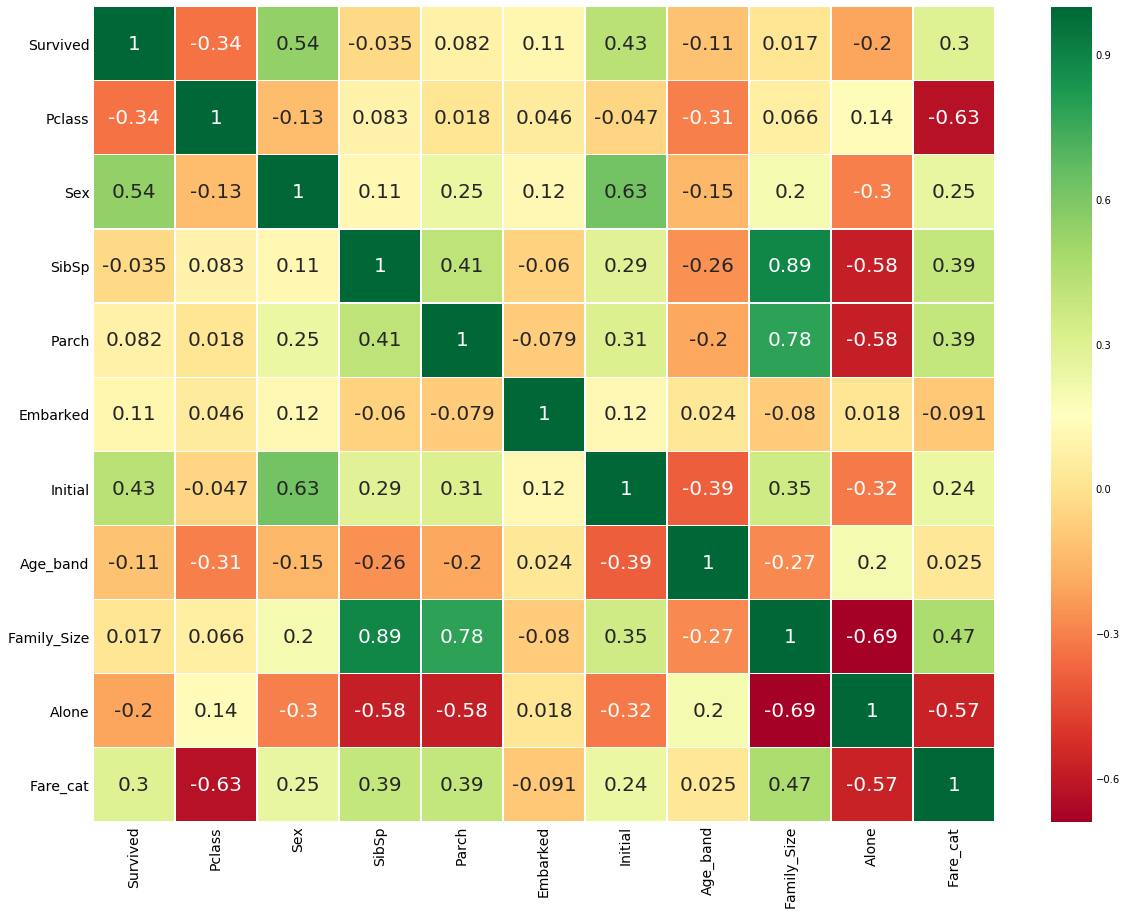

In [45]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Now the above correlation plot, we can see some positively related features. Some of them being **SibSp and Family_Size** and **Parch and Family_Size** and some negative ones like **Alone and Family_Size.**
- 위에 상호관계 그래프를 보면 몇가지의 양성 관계 피처들을 볼 수 있습니다. 형제와 가족크기, 배우자와 가족크기 등이 있고 음성 관계로 혼자와 가족크기가 있습니다. 

# Part3: Predictive Modeling / 예측 모델링

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.
- 위에 상호관계 그래프를 보면 몇가지의 양성 관계 피처들을 볼 수 있습니다. 형제와 가족크기, 배우자와 가족크기 등이 있고 음성 관계로 혼자와 가족크기가 있습니다. 그랴서 우리는 승객의 생사를 몇가지 분류 알고리즘을 이용해서 예측 할것입니다.

Following are the algorithms I will use to make the model:
- 다음은 제가 모델을 만들때 사용할 알고리즘입니다:

1)Logistic Regression / 로지스틱회귀

2)Support Vector Machines(Linear and radial) / 서포트 벡터 머신

3)Random Forest / 랜덤 포레스트

4)K-Nearest Neighbours / K-근접 이웃들

5)Naive Bayes / 나이브 베이즈

6)Decision Tree / 결정 트리

7)Logistic Regression / 로지스틱 회귀

In [46]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [47]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [48]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [49]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [50]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8171641791044776


### Decision Tree

In [51]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))


The accuracy of the Decision Tree is 0.8097014925373134


### K-Nearest Neighbours(KNN)

In [52]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552238806


Now the accuracy for the KNN model changes as we change the values for **n_neighbours** attribute. The default value is **5**. Lets check the accuracies over various values of n_neighbours.
- 이제 n_neighbours 속성의 값을 변경하면 KNN 모델의 정확도가 변경됩니다. 기본값은 5입니다. n_neighbours의 다양한 값에 대한 정확도를 확인해봅시다.

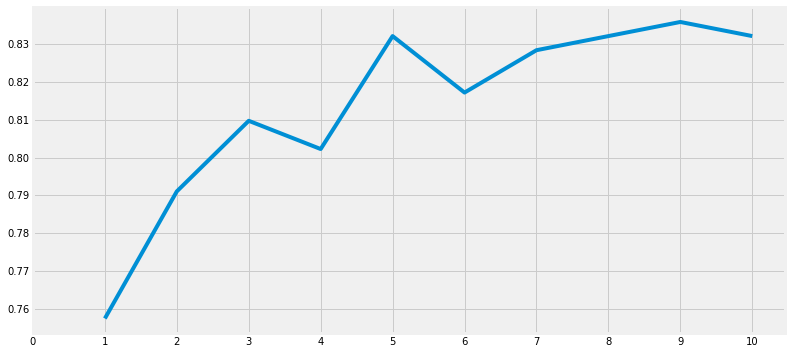

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [53]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Gaussian Naive Bayes

In [54]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forests

In [55]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8208955223880597


The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.
- 모델의 정확도가 모델의 분류의 견고성(?)을 결정짓는 유일한 요소는 아닙니다. 분류기가 훈련데이터로 훈련 받고 테스트 데이터로 테스트한 후 그 점수가 90%의 정확도라고 합시다.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??. The answer is **No**, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as **model variance**.
- 이게 분류기로써 매우 좋은 정확도로 보입니다. 하지만 모든 새로운 테스트 데이터 셋에세도 그럴까요? 답은 No입니다. 왜냐하면 우리는 분류기가 자기자신을 훈련하기 위해 사용할 모든 사례들을 정할 수 없기 때문입니다. 하지만 모든 새로운 테스트 데이터 셋에세도 그럴까요? 답은 No입니다. 왜냐하면 우리는 분류기가 자기자신을 훈련하기 위해 사용할 모든 사례들을 정할 수 없기 때문입니다. 

To overcome this and get a generalized model,we use **Cross Validation**.
- 하지만 모든 새로운 테스트 데이터 셋에세도 그럴까요? 답은 No입니다. 왜냐하면 우리는 분류기가 자기자신을 훈련하기 위해 사용할 모든 사례들을 정할 수 없기 때문입니다.


# Cross Validation / 교차 검증

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset. 
- 하지만 모든 새로운 테스트 데이터 셋에세도 그럴까요? 답은 No입니다. 왜냐하면 우리는 분류기가 자기자신을 훈련하기 위해 사용할 모든 사례들을 정할 수 없기 때문입니다. 그렇지만 우리는 모든 경우와 대이터 셋에 대해서 훈련과 테스트를 진행해야합니다. 그런 다음에 모든 대이터셋에 대한 기록된 정확도의 평균값을 구할 수 있습니다.

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.
- 1) K겹 교차검증은 데이터셋을 k서브 데이터셋으로 나누는 것에서 시작합니다.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.
- 2) K=5의 파트로 데이터셋을 나눈다고 합시다. 우리는 1개의 파트를 알고리즘 테스트를 위해 사용하고 나머지 4개의 파트는 훈련을 위해 사용하는 것으로 분배합니다.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm. This is called K-Fold Cross Validation.
- 3) 우리는 각각의 훈련과 태스트 파트를 바꿔가면서 진행합니다. 그러면 정확도와 오류가 평균화 되어 특정 알고리즘의 정확도가 측정됩니다. 이것이 K-겹 교차검증 입니다.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.
- 4) 알고리즘은 어떤 데이터 셋에 대하여 과소적합이 될 수도 있고, 과적합이 될 수도 있습니다. 우리는 교차 검증을 통해서 일반적인 모델을 얻을 수 있습니다.

In [56]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.813708,0.027949
Naive Bayes,0.801386,0.028999
Random Forest,0.812597,0.031615


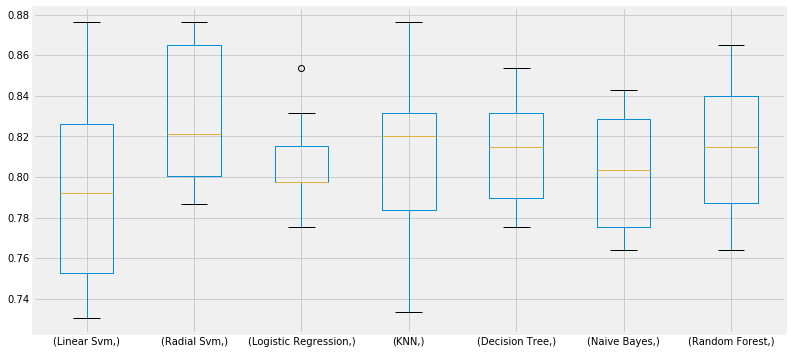

In [57]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

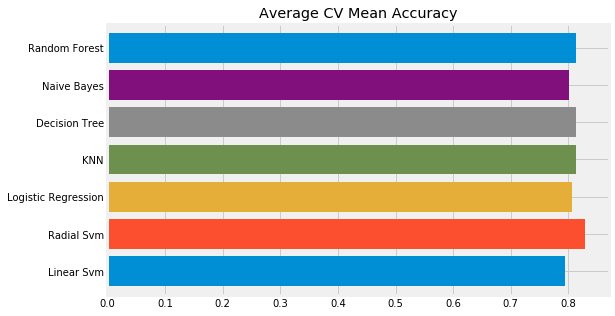

In [58]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.
- 불균형으로 인해 분류 정확도가 오도 될 수 있습니다. 컨퓨전 행렬을 통해 요약 된 결과를 얻을 수 있습니다. 컨퓨전 행렬은 모델이 잘못되었거나 모델이 잘못 예측 한 클래스를 나타냅니다.

## Confusion Matrix / 컨퓨전 행렬

It gives the number of correct and incorrect classifications made by the classifier.
- 불균형으로 인해 분류 정확도가 오도 될 수 있습니다. 컨퓨전 행렬을 통해 요약 된 결과를 얻을 수 있습니다. 컨퓨전 행렬은 모델이 잘못되었거나 모델이 잘못 예측 한 클래스를 나타냅니다.

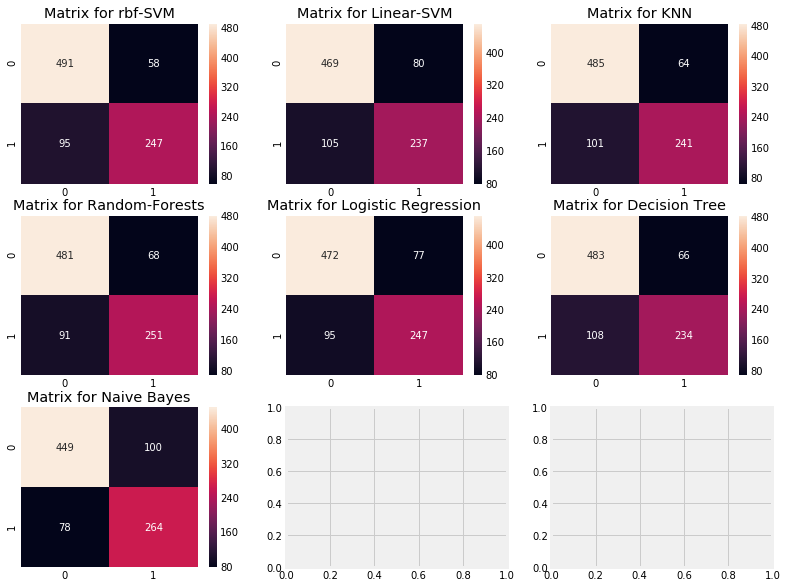

In [59]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Interpreting Confusion Matrix / 컨퓨전 매트릭스 해석

The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. 
- 왼쪽 대각선은 각 클래스에 대하여 맞는 예측을 한 경우이고 그리고 오른쪽 대각선은 잘못된 예측의 숫자를 보여줍니다.
Lets consider the first plot for rbf-SVM:
- 먼저 rbf-SVM 그래프부터 봅시다.
1)The no. of correct predictions are **491(for dead) + 247(for survived)** with the mean CV accuracy being **(491+247)/891 = 82.8%** which we did get earlier.
- 1) 맞는 예측은 **491(사망자)+247(생존자)** 이고, 평균 교차검증(이하 CV) 정확도는 앞써 얻었듯 **(491+247)/891 = 82.8%** 입니다.

2)**Errors**-->  Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.
- 2) **오차들**--> 58명의 생존했다고 분류된 사망자와 95명의 사망자로 분류된 생존자가 발생했습니다. 따라서 이는 사망자를 생존자로 분류하는 과정에서 더 많은 실수를 범했습니다.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.
- 모든 행렬들을 볼때, 우리는 rdf-SVM이 사망자 예측을 정확히 하는데 더 좋고, 나이브 베이즈가 생존자를 예측하는데 좋다는 것을 

### Hyper-Parameters Tuning / 하이퍼 파라미터 튜닝(최적화)

The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.
- 머신러닝 모델은 마치 블랙박스와 같습니다. 보통 블랙박스에 우리가 튜닝하거나 바꿔서 더 좋은 모델을 얻을 수 있는 몇개의 기본 피라미터 값이 있습니다. SVM 모델에 C와 감마와 다른 모델들의 비슷하지만 다른, 역시 우리가 좋은 모델을 얻기 위해 튜닝해서 알고리즘의 학습률을 바꿀 수 있는 하이퍼 파라미터가 있습니다. 이것은 하이퍼파라미터 튜닝이라고 알려져있습니다.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.
- 우리는 이제 2개의 좋은 분류기인 SVM과 RandomForests의 하이퍼 파라밑터를 튜닝해볼 것입니다.
#### SVM

In [60]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   13.1s finished


#### Random Forests

In [61]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   24.1s finished


0.8170594837261503
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


The best score for Rbf-Svm is **82.82% with C=0.05 and gamma=0.1**.
For RandomForest, score is abt **81.8% with n_estimators=900**.
- Rbf-SVM의 가장 좋은 점수는 **82.82%로 C=0.05, gamma=0.1**일때 였습니다. RandomForest의 경우 **n_esstimators=900일때 81.8%**로 가장 좋았습니다.

# Ensembling / 앙상블

Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.
- 앙상블은 모델의 정확성과 성능을 향상시키는데 좋은 방법입니다. 간단하게 간단한 모델을 합쳐서 하나의 강력한 모델을 만드는 것입니다.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is **Ensembling**, which improves the stability of the model. 
- 만약 우리가 핸드폰을 구매하고 싶어 많은 사람들에게 여러가지 파라미터에 근거해서 물어볼 것입니다. 모두 다른 파라미터를 분석한 뒤에 우리는 한 제품에 대해 강한 판단을 내릴 수 있습니다. 이것이 모델의 견고성을 개선하는 "앙상블"입니다.

Ensembling can be done in ways like:
- 앙상블은 다음의 순서로 진행됩니다:

1)Voting Classifier
- 1) 보팅 분류기

2)Bagging
- 2) 배깅

3)Boosting.
- 3) 부스팅

## Voting Classifier / 보팅 분류기

It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of diiferent types.
- 이는 가장 간단하게 여러 간단한 기계학습 모델들의 예측을 합하는 방법입니다. 이는 하위모델들의 예측 결과를 바탕으로 평균 예측 결과를 제공합니다. 하위모델 또는 베이스모델은 모두 다른 타입입니다.

In [62]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8237660310974917


## Bagging / 배깅

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.
- 배깅은 일반적인 앙상블 모델입니다. 이 모델은 데이터 세트의 작은 부분에 비슷한 분류기를 적용한 다음 모든 예측의 평균을 취함으로써 작동합니다. 평균화에 의해, 분산이 감소합니다. 보팅 분류기와 다르게, 배깅은 비슷한슷한 분류기를 사용합니다.

#### Bagged KNN / 배깅된 KNN

Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of **n_neighbours**, as small value of n_neighbours.
- 배깅은 높은 분산을 갖고있는 모델에서 가장 잘 작동합니다. 그 예로 결정트리와 Random Forests 모델이 있습니다. 우리는 작은 n_이웃들의 값을 갖고 있는 KNN을 적은 값의 n_이웃들로 사용할 수 있습니다.

In [63]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8148893428668709


#### Bagged DecisionTree


In [64]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8204826353421859


## Boosting / 부스팅

Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:
- 부스팅은 절차적인 학습과 분류기를 사용하는 앙상블 기술입니다. 이것은 약한 모델들의 한단계 한단계 개선입니다. 부스팅은 다음에 따라 작동합니다:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.
- 모델은 가장 먼저 완성된 데이터셋으로 훈련됩니다. 이제 모델은 몇몇 인스턴스는 맞게 취할 것이고, 몇몇은 틀리게 취할것입니다. 다음 반복에서는 잘못 예측한 인스턴스에 집중하거나 더 많은 가중치를 부여합니다. 모델은 잘못 예측한 인스턴스를 맞게 예측하려 할 것입니다. 이런 반복 과정이 계속 되면, 정확도의 한계에 도달할때까지 새로운 분류기 모델이 추가됩니다.

#### AdaBoost(Adaptive Boosting) / 에이다부스트(적응형 부스팅)

The weak learner or estimator in this case is a Decsion Tree.  But we can change the dafault base_estimator to any algorithm of our choice.
- 여기서 약한 학습자와 평가자는 결정 트리입니다. 우리는 기본 base_estimator를 우리가 정하는 알고리즘으로 바꿀 수 있습니다.

In [65]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249526160481218


#### Stochastic Gradient Boosting / 확률적 그라디언트 부스팅 

Here too the weak learner is a Decision Tree.
- 여기서도 약한 학습자는 결정 트리 입니다.

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8182862331176939


#### XGBoost / XG부스트

In [67]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8104710021563954


We got the highest accuracy for AdaBoost. We will try to increase it with Hyper-Parameter Tuning
- 우리는 에이다부스트에서 가장 높은 정확도를 보였습니다. 하이퍼-파리미터 튜닝을 통해서 더 높여보도록 하겠습니다.

#### Hyper-Parameter Tuning for AdaBoost / 에이다부스트 하이퍼-파리미터 튜닝

In [68]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  6.2min finished


0.8316498316498316
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=200, random_state=None)


The maximum accuracy we can get with AdaBoost is **83.16% with n_estimators=200 and learning_rate=0.05**
- 에이다 부스트로 얻은 최대 정확도는 **83.16%로 n_estimator=200 그리고 learning_rate=0.05**일때 였습니다.

### Confusion Matrix for the Best Model / 베스트 모델의 컨퓨전 행렬

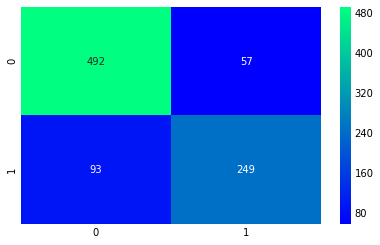

In [69]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance / 피처 중요도

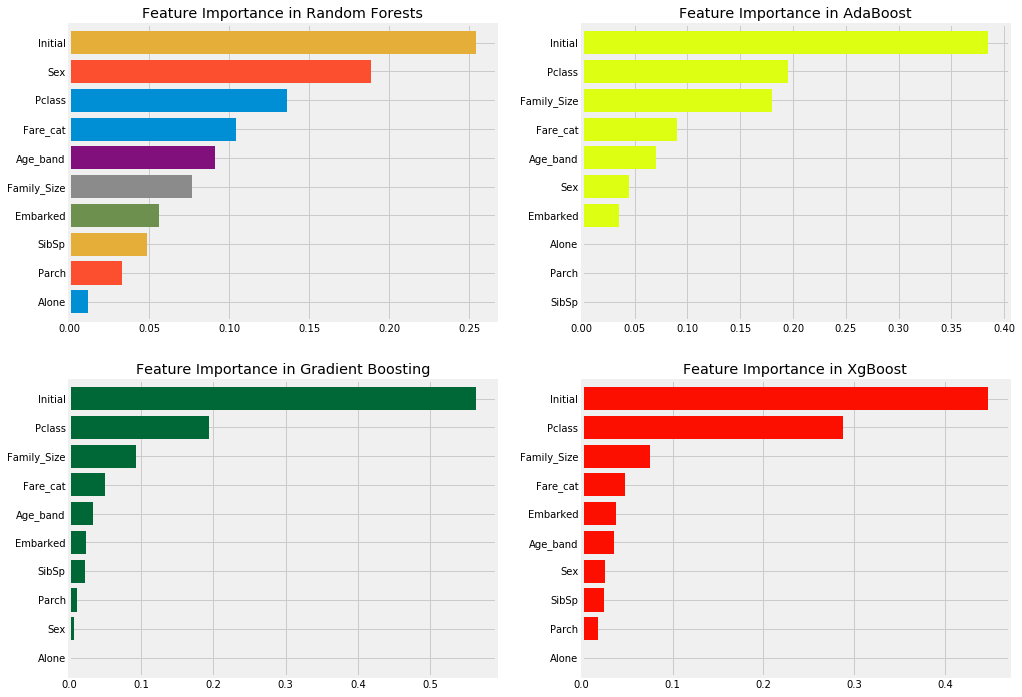

In [70]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

We can see the important features for various classifiers like RandomForests, AdaBoost,etc.
- 우리는 각각의 분류기별로 중요한 피처들을 볼 수 있습니다. (랜덤 포레스트, 에이다부스트 등)

#### Observations: 분석결과

1)Some of the common important features are Initial,Fare_cat,Pclass,Family_Size.
- 1)몇가지 중요한 피처들은 이니셜, 비용_카테고리, Pclass(등석), 가족크기임.

2)The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.
- 2) 성별 피처는 놀랍게도 그렇게 중요도가 높지 않음.. 우리가 앞서 Pclass와 결합된 성별은 좋은 차별화된 요소를 제공한다는 것을 봤기 때문. 성별은 랜덤 포레스트에서만 중요한것 같음.
 
However, we can see the feature Initial, which is at the top in many classifiers. We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.
- 그나저나, 우리는 많은 분류기에서 이니셜 피처가 중요하다고 하는 것을 볼 수 있음. 우리는 이미 이니셜과 성별의 상호관계성을 보았기 때문에 두가지 모두 성별을 나타냄을 알 수 있음.

3)Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.
- 3) 비슷하게 Pclass와 비용_카테고리는 승객의 상태를 나타내고, 가족_크기는 혼자, 배우자, 형제자매를 나타냄.

I hope all of you did gain some insights to Machine Learning. Some other great notebooks for Machine Learning are:
- 모두가 머신 러닝에 인사이트가 있었으면 좋겠습니다. 머신러닝과 관련된 새로운 노트북들:

1) For R:[Divide and Conquer by Oscar Takeshita](https://www.kaggle.com/pliptor/divide-and-conquer-0-82297/notebook)

2)For Python:[Pytanic by Heads and Tails](https://www.kaggle.com/headsortails/pytanic)

3)For Python:[Introduction to Ensembling/Stacking by Anisotropic](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)

### Thanks a lot for having a look at this notebook. If you found this notebook useful, **Do Upvote**.
### 이 노트북을 봐주셔서 감사합니다. 만약 도움이 되었다면 **Upvote** 부탁드립니다.
